In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-11-1 15:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from processes import preprocessing, construct_image_info, post_process, get_model_info
import acl, cv2, struct, time, os
import numpy as np
from PIL import Image, ImageDraw
from IPython import display
import matplotlib.pyplot as plt

In [2]:
image_file = 'kite.jpg'

img_path = f"./data/{image_file}"

model_path = "yolov4_caffe_910.om"

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [3]:
get_model_info(model)

	Input Dimensions
Name: data
Dimensions: [1, 608, 608, 3]
---------------------------------
Name: img_info
Dimensions: [1, 4]
---------------------------------


	Output Dimensions
Name: detection_out3:0:box_out
Dimensions: [1, 6144]
---------------------------------
Name: detection_out3:1:box_out_num
Dimensions: [1, 8]
---------------------------------


In [4]:
img_org_bgr = cv2.imread(img_path)

data = preprocessing(img_org_bgr, model._model_desc,model_name="yolov4")

%timeit -n 10 -r 3

result_list = model.execute([data, construct_image_info()]) # ??? [ 416.  416.  900. 1352.], size:4 ???

image_output = post_process(result_list, cv2.imread(img_path), img_path)

img_resized shape (608, 608, 3)
post process
image shape = (900, 1352, 3)
scalex : 3.25
scaley : 2.1634615384615383
output path: ./out/kite.jpg
image file =  ./data/kite.jpg
box_num: 16
 person: class  0, box  203  662  281  892, score  0.995117
 person: class  0, box  97  581  176  798, score  0.994141
 person: class  0, box  76  493  113  581, score  0.958008
 person: class  0, box  517  498  536  531, score  0.897949
 person: class  0, box  31  499  60  570, score  0.858398
 person: class  0, box  530  510  558  538, score  0.798828
 person: class  0, box  342  483  359  507, score  0.776855
 person: class  0, box  174  534  196  584, score  0.668457
 person: class  0, box  21  523  41  560, score  0.612305
 kite: class  33, box  572  62  691  168, score  0.994141
 kite: class  33, box  274  225  311  291, score  0.955078
 kite: class  33, box  1079  388  1105  429, score  0.951172
 kite: class  33, box  570  337  611  378, score  0.937500
 kite: class  33, box  462  335  487  363, 

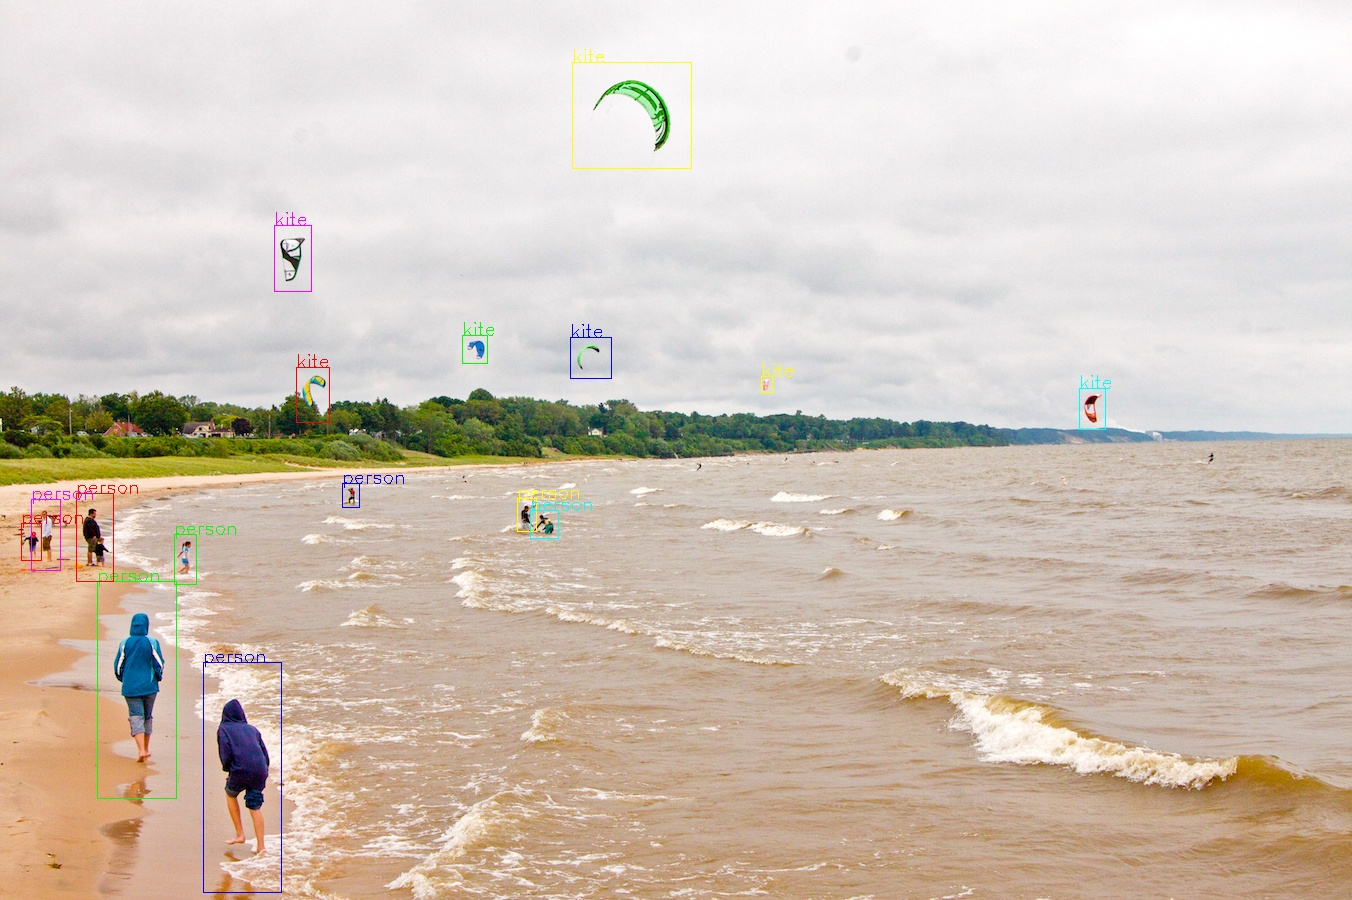

In [5]:
display.Image(f'./out/out_{image_file}')